In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans,MeanShift,AgglomerativeClustering
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
import warnings
warnings.filterwarnings('ignore')

### Understand the working of kmeans algorithm first with simple example

##### Create a simple dataset with 2 columns:

In [3]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

##### Create scatter plot between 1st and 2nd column:

<AxesSubplot:>

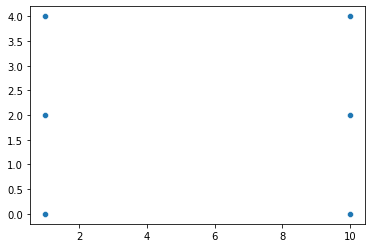

In [4]:
x = X[:,0]
y = X[:,1]
sns.scatterplot(x,y)

##### Create kmeans model for 2 clusters:

In [5]:
km = KMeans(n_clusters=2, random_state=0)
km.fit(X)

KMeans(n_clusters=2, random_state=0)

##### Print centroids

In [6]:
km.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

##### Print scatter plot with hue as cluster labels_:

<AxesSubplot:>

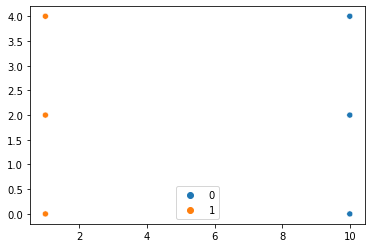

In [7]:
x = X[:,0]
y = X[:,1]
sns.scatterplot(x, y, hue=km.labels_)

##### Predict the cluster an unknown sample belongsto:

In [8]:
km.predict([[12,3]])

array([0])

## Step1. [Understand Data]

In [9]:
df = pd.read_csv("Mall_Customers.csv")

In [10]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.shape

(200, 5)

In [12]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [15]:
df.value_counts()

CustomerID  Genre   Age  Annual Income (k$)  Spending Score (1-100)
1           Male    19   15                  39                        1
138         Male    32   73                  73                        1
128         Male    40   71                  95                        1
129         Male    59   71                  11                        1
130         Male    38   71                  75                        1
                                                                      ..
70          Female  32   48                  47                        1
71          Male    70   49                  55                        1
72          Female  47   49                  42                        1
73          Female  60   50                  49                        1
200         Male    30   137                 83                        1
Length: 200, dtype: int64

customers_data = pd.read_csv("Mall_Customers.csv")

## Step2. [Label encode gender]

In [16]:
label_encoder = LabelEncoder()
df["Genre"] = label_encoder.fit_transform(df["Genre"]) 
df=df.drop('CustomerID',axis=1)

**To get 'gender' column in numerical type we used LabelEncoder() where **

**1 - Male**

**0 - Female** 

In [18]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [99]:
df.Genre.value_counts()             #There are 112 males and 88 females

0    112
1     88
Name: Genre, dtype: int64

## Step3.[Check for variance]

In [20]:
df.describe()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


**As there is no column variance is high , so we ignore it and no need of noramlize**

In [21]:
df.corr()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
Genre,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


## Step4.[Check Skewness]

In [22]:
df.skew().sort_values(ascending=False)

Age                       0.485569
Annual Income (k$)        0.321843
Genre                     0.243578
Spending Score (1-100)   -0.047220
dtype: float64

**As no columns skew value is greater than 0.75, then no need to perform log transformation on any of the column**

## Step5.[Pair Plot]

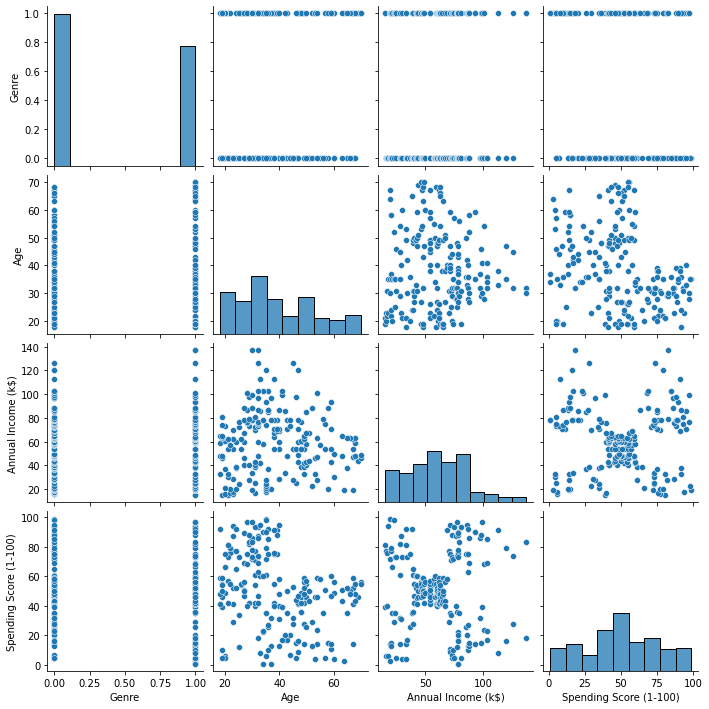

In [23]:
sns.pairplot(df)

## Step6. [Build KMeans]

In [24]:
model = KMeans(n_clusters=5)

In [25]:
model.fit(df)

KMeans(n_clusters=5)

In [26]:
model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [27]:
model.cluster_centers_

array([[ 0.41772152, 43.12658228, 54.82278481, 49.83544304],
       [ 0.51351351, 40.32432432, 87.43243243, 18.18918919],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348]])

**K means is an iterative clustering algorithm that aims to find local maxima in each iteration**

**Here n_clusters variable value K is 5 (0,1,2,3,4) for 200 data points in 2-D space** 

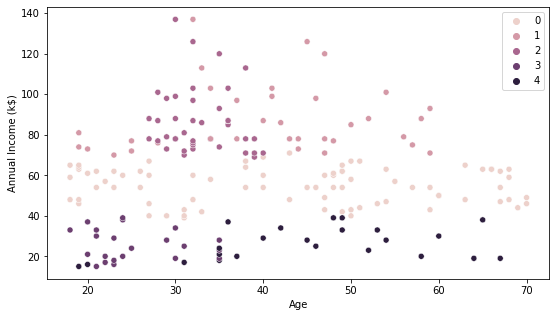

In [28]:
plt.figure(figsize=(9,5))
sns.scatterplot(df['Age'],df['Annual Income (k$)'],hue=model.labels_)
plt.show()

**Above scatterplot between age and annual income with hue as 'labels_'**

**The kMeans algorithm has not given any indication as to what these 5 groups are. Unfortunately, there is no magic approach here.**

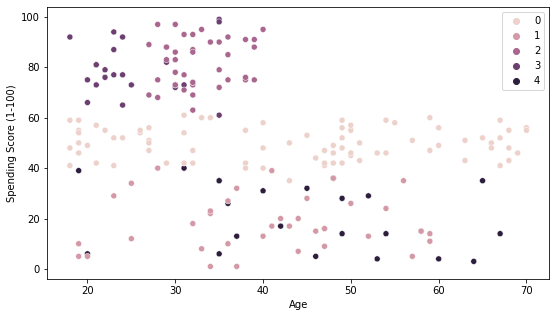

In [29]:
plt.figure(figsize=(9,5))
sns.scatterplot(df['Age'],df['Spending Score (1-100)'],hue=model.labels_)
plt.show()

**Above scatterplot between age and Spending Score with hue as 'labels_'**

**The kMeans algorithm has not given any indication as to what these 5 groups are. Unfortunately, there is no magic approach here.**


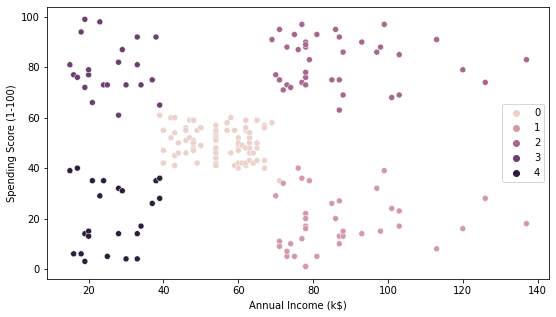

In [30]:
plt.figure(figsize=(9,5))
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=model.labels_)
plt.show()

## Step8. [Cluster Analysis].

**here is new kmeans clusting with init k-means++**

In [31]:
kmeans2 = KMeans(n_clusters = 5,init='k-means++')
kmeans2.fit(df)
pred = kmeans2.predict(df)

In [32]:
frame = df.copy()
frame['cluster'] = pred

In [33]:
kmeans2 = KMeans(n_clusters = 5)
kmeans2.fit(df)
pred = kmeans2.predict(df)

temp= pd.DataFrame(df)
temp['cluster'] = pred

a=temp.groupby(['cluster'])

**Here some details have been given for each clusters 

In [34]:
for i in range(5):
    print("Average Age ",i," cluster = ",a['Age'].mean()[i])
    print("Average annual income of ",i," cluster = ",a['Annual Income (k$)'].mean()[i])
    print("Deviation of the mean for annual income ",i," cluster = ",a['Annual Income (k$)'].std()[i])
    print("number of customers ",a.groups[i].size)
    print("From those customers we have ",a['Genre'].value_counts()[i][1]," male and ",a['Genre'].value_counts()[i][0]," female")
    print("\n")

Average Age  0  cluster =  45.21739130434783
Average annual income of  0  cluster =  26.304347826086957
Deviation of the mean for annual income  0  cluster =  7.8938110545177675
number of customers  23
From those customers we have  9  male and  14  female


Average Age  1  cluster =  43.08860759493671
Average annual income of  1  cluster =  55.29113924050633
Deviation of the mean for annual income  1  cluster =  8.71066528521977
number of customers  79
From those customers we have  33  male and  46  female


Average Age  2  cluster =  32.69230769230769
Average annual income of  2  cluster =  86.53846153846153
Deviation of the mean for annual income  2  cluster =  16.312484972924977
number of customers  39
From those customers we have  18  male and  21  female


Average Age  3  cluster =  25.52173913043478
Average annual income of  3  cluster =  26.304347826086957
Deviation of the mean for annual income  3  cluster =  7.8938110545177675
number of customers  23
From those customers we ha

## Step9. [Find the best number of clusters]

In [35]:
X = df.iloc[:,[2,3]].values

In [36]:
SSE = []
for cluster in range(1,20):
    km = KMeans(n_clusters=cluster, init="k-means++")
    km = km.fit(X)
    SSE.append(km.inertia_)

Text(0, 0.5, 'Inertia')

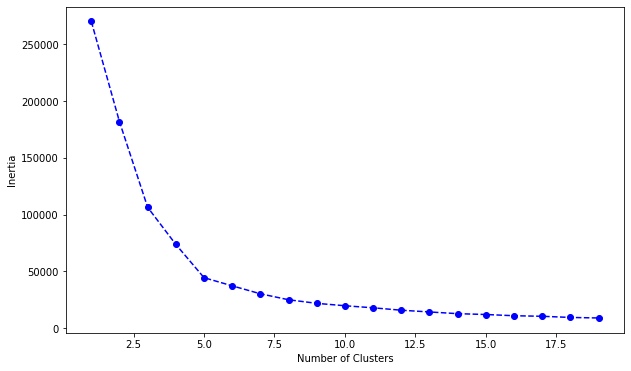

In [37]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1,20),SSE,'bo--')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

## Step10. [Reduce Dimensions using PCA]

In [38]:
X = df.iloc[:,[0,1,2,3]].values

In [42]:
X_std = scale.fit_transform(X)

In [53]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
PCA_components = pd.DataFrame(principalComponents)

In [54]:
PCA_components

,0,1
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412
...,...,...
195,58.352515,31.017542
196,19.908001,66.446108
197,58.520804,38.346039
198,20.979130,79.376405


In [55]:
model1 = KMeans(n_clusters=5)

In [56]:
model1.fit(PCA_components)

KMeans(n_clusters=5)

In [57]:
model1.cluster_centers_

array([[-44.38675468, -10.05043814],
       [ 41.55103875,   1.87087541],
       [-10.22445521,  42.33140596],
       [ -4.41026389,  -3.10070422],
       [  4.98536192, -46.67336912]])

In [68]:
model1.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

## Step11.[Scatter Plot]

Text(0, 0.5, 'PCA 2')

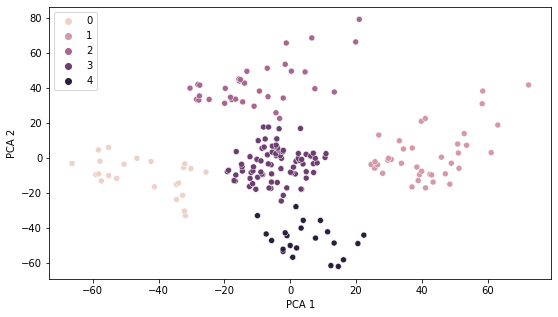

In [69]:
plt.figure(figsize=(9,5))
sns.scatterplot(PCA_components[0],PCA_components[1],hue=model1.labels_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

## Step12. [ MeanShift clustering]

In [70]:
model2 = MeanShift(bandwidth=25)

In [71]:
model2.fit(PCA_components)

MeanShift(bandwidth=25)

In [72]:
model2.cluster_centers_

array([[ -4.66533743,  -3.16070017],
       [-11.84331538,  28.48516532],
       [ 39.08777605,  -1.63073569],
       [  3.38717482, -40.01057119],
       [-43.24808109,  -7.94108023]])

Text(0, 0.5, 'PCA 2')

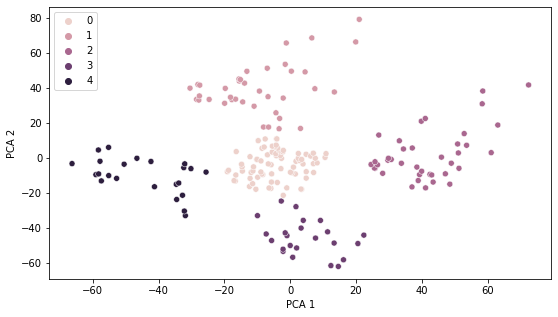

In [73]:
plt.figure(figsize=(9,5))
sns.scatterplot(PCA_components[0],PCA_components[1],hue=model2.labels_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

## Step13. [Predict hierarchical clusters using AgglomerativeClustering]

In [74]:
model3 = AgglomerativeClustering(n_clusters=5,compute_full_tree=True)

In [81]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,0
1,1,21,15,81,3
2,0,20,16,6,0
3,0,23,16,77,3
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,4
197,1,32,126,74,2
198,1,32,137,18,4


In [98]:
df.cluster.value_counts().sort_index(ascending = True) 

0    23
1    79
2    39
3    23
4    36
Name: cluster, dtype: int64

In [82]:
model3.fit(df.iloc[:,:4])

AgglomerativeClustering(compute_full_tree=True, n_clusters=5)

In [83]:
model3.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [84]:
frame = df.copy()
frame['cluster'] = model3.labels_

In [85]:
frame

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,1
197,1,32,126,74,2
198,1,32,137,18,1


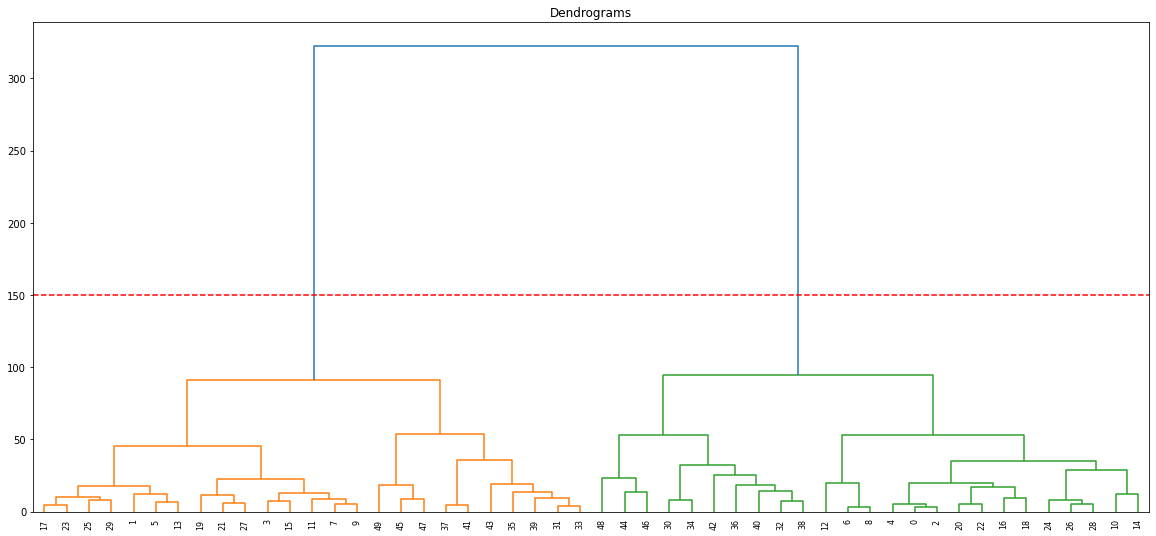

In [95]:
plt.figure(figsize=(20,9))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(frame[150:200],method='ward'))
plt.axhline(y=150,color='r',linestyle='--')

## Step14. [Visualize scatter plot with hue as agglomerativeclustering labels_]

Text(0, 0.5, 'Spending Score (1-100)')

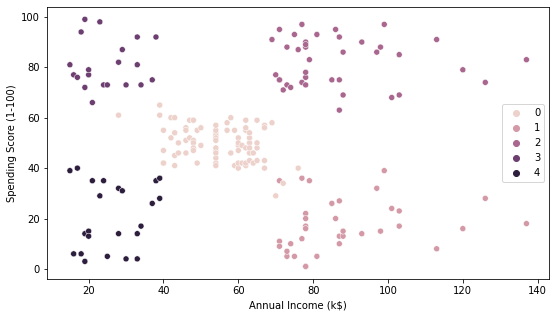

In [96]:
plt.figure(figsize=(9,5))
sns.scatterplot(frame['Annual Income (k$)'],frame['Spending Score (1-100)'],hue=model3.labels_)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')